### Desenvolvimento e Entrega do 3º Checkpoint - Data Science e Statistical
 
**Nomes + RM dos integrantes:**
- Guilherme Akio - 98582
- Matheus Motta - 550352
- Fabrício Saavedra - 97631
 
**Turma:** 2ESPW
 
**Ano:** 2024
___
 
### Descrição do Projeto
O projeto Checkpoint 3 de Análise de Dados visa conduzir uma análise detalhada do conjunto de dados "US Accidents (2016-2023)", utilizando técnicas de inteligência artificial e aprendizado de máquina para examinar diversos parâmetros apresentados na base. Ao longo do projeto, serão formuladas 10 questões de pesquisa que orientarão a análise e a interpretação dos dados, permitindo extrair insights significativos e identificar tendências relevantes nos acidentes de trânsito.

### Executando o projeto

Para executar o projeto é necessario baixar o dataset "US Accidents 2021-2023" e acrescentar o caminho do mesmo(caso esteja em uma pasta avulsa) dentro do codigo em "Travamento de base"

> Base: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

```
df = pd.read_csv('US_Accidents_March23.csv')
```

Após isso basta executar todas as celulas em sequencia

> Etapa necessaria apenas caso queira executar o codigo, as informações ja sao exibidas ao abrir o arquivo


#### Bibliotecas

In [4]:
import pandas as pd
import calendar 
from datetime import datetime 
import numpy as np 
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import seaborn as sns
from geopy.exc import GeocoderTimedOut
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

#### Tratamento de Base
Redução do tamanho do arquivo a ser trabalhado limitando a dados de 2021

In [5]:
df = pd.read_csv('US_Accidents_March23.csv')

# Converter 'Start_Time' para datetime, caso ainda não esteja
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Remover valores NaT que não puderem ser convertidos
df = df.dropna(subset=['Start_Time'])

# Filtrar os dados para os anos entre 2021 e 2023
filtered_df = df[(df['Start_Time'].dt.year >= 2021) & (df['Start_Time'].dt.year <= 2023)]

# Salvar a tabela filtrada em um novo arquivo CSV (ou trabalhar diretamente com filtered_df)
filtered_df.to_csv('US_Accidents_2021_2023.csv', index=False)

print("Tabela menor criada com sucesso!")

Tabela menor criada com sucesso!


In [6]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2847791 entries, 512217 to 6928390
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

#### Quais estados registraram o maior número de acidentes entre 2021 e 2023?
O gráfico mostra o número de acidentes por estado entre 2021 e 2023. Observa-se que a Califórnia (CA) lidera com folga o número de acidentes, ultrapassando 600.000 casos, seguida pelo Texas (TX) com pouco mais de 400.000 casos. Outros estados com números elevados incluem Flórida (FL), Nova York (NY), e Pensilvânia (PA), mas com uma quantidade significativamente menor em comparação com CA e TX. Essa distribuição sugere uma concentração maior de acidentes em estados com alta densidade populacional e tráfego intenso, especialmente em áreas urbanas. Estados menores ou com menor densidade populacional apresentam números substancialmente mais baixos de acidentes.

In [7]:
# Contar o número de acidentes por estado
state_counts = filtered_df['State'].value_counts()

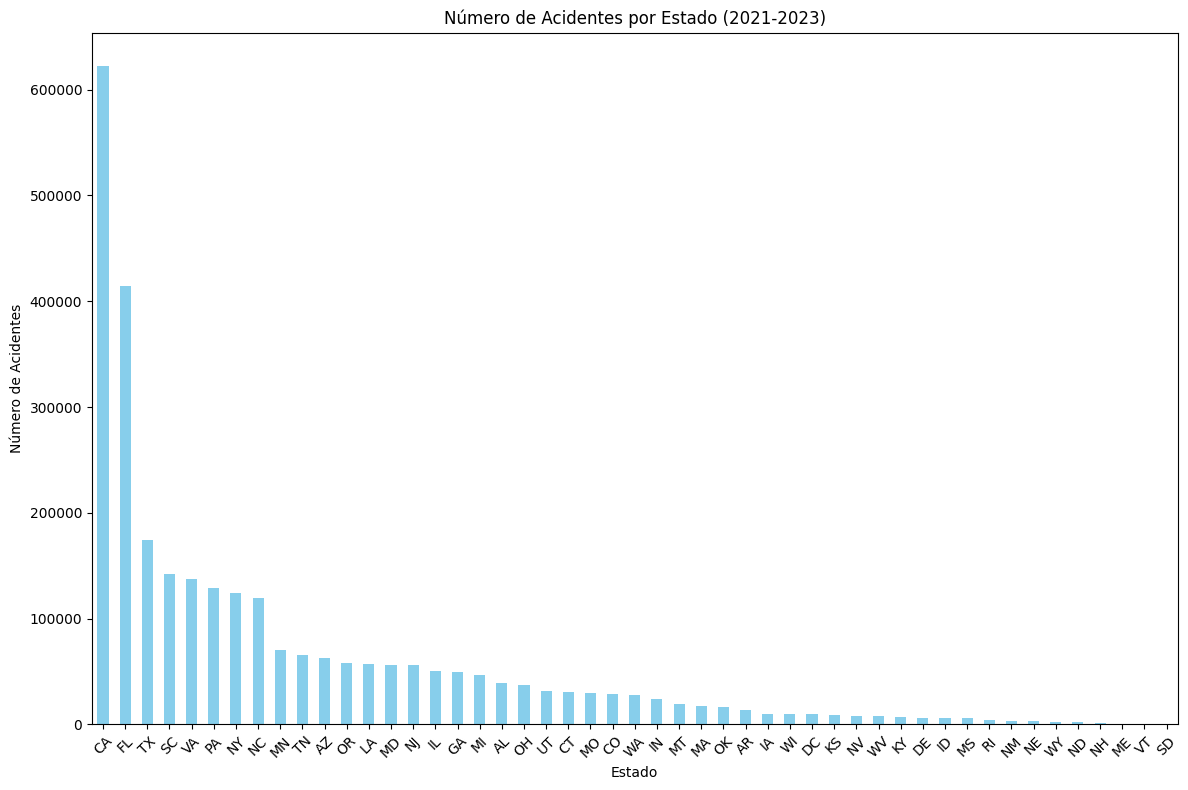

In [8]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
state_counts.plot(kind='bar', color='skyblue')
plt.title("Número de Acidentes por Estado (2021-2023)")
plt.xlabel("Estado")
plt.ylabel("Número de Acidentes")
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta o layout para evitar cortes no eixo x

# Exibir o gráfico
plt.show()

#### Quais são as implicações para a segurança viária em Los Angeles em comparação com outras grandes cidades da Califórnia, considerando o número de acidentes entre 2021 e 2023?
O gráfico revela que Los Angeles possui um número significativamente maior de acidentes em comparação com outras cidades da Califórnia, superando em mais de duas vezes o número de acidentes de Sacramento e San Diego, as próximas cidades na lista. Esse dado sugere que Los Angeles enfrenta desafios maiores relacionados ao tráfego e segurança viária, o que pode ser atribuído a fatores como alta densidade populacional, trânsito intenso e possíveis falhas na infraestrutura viária. Essa discrepância indica a necessidade de medidas mais rigorosas de segurança e planejamento urbano em Los Angeles para reduzir o número de acidentes, enquanto outras cidades como Sacramento e San Diego podem exigir intervenções menos intensivas, mas ainda assim relevantes.

In [9]:
# Filtrar para incluir apenas acidentes na Califórnia
california_df = filtered_df[filtered_df['State'] == 'CA']

# Contar o número de acidentes por cidade na Califórnia
city_counts = california_df['City'].value_counts().head(10)  # Mostra as 10 cidades com mais acidentes

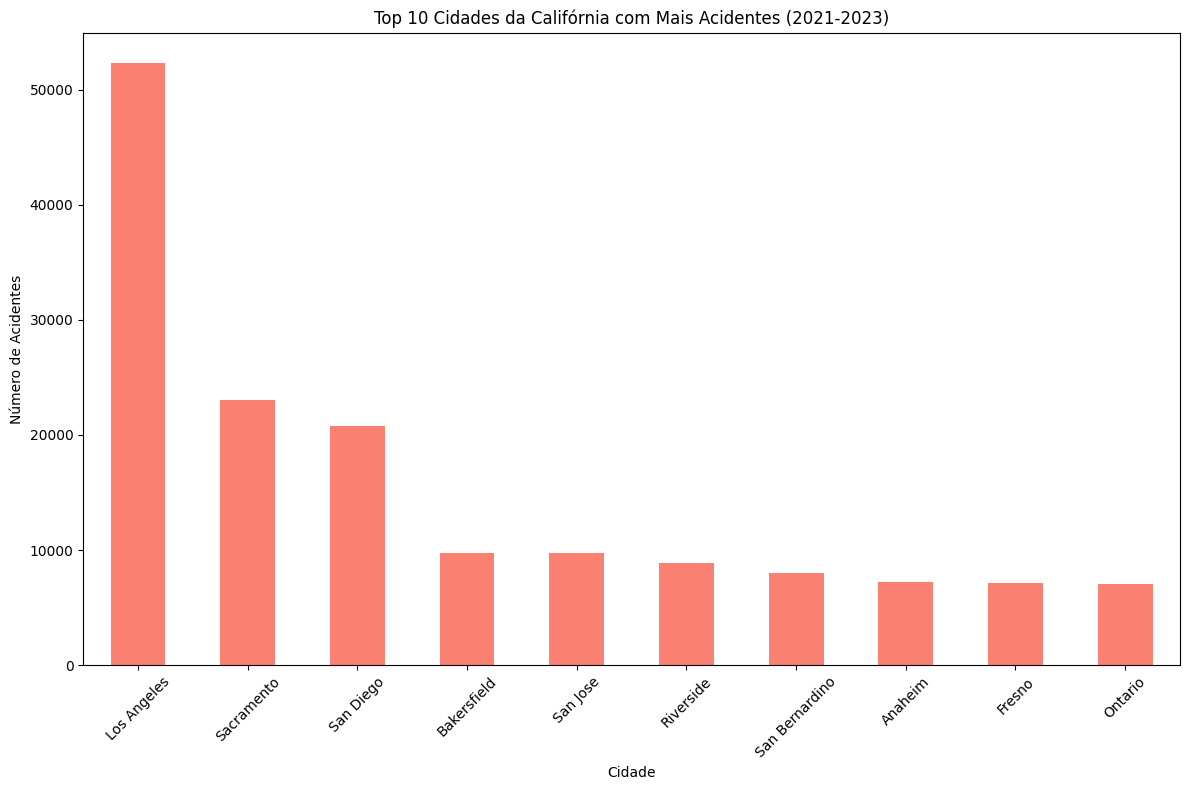

In [10]:
# Criar o gráfico de barras para as cidades com mais acidentes
plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar', color='salmon')
plt.title("Top 10 Cidades da Califórnia com Mais Acidentes (2021-2023)")
plt.xlabel("Cidade")
plt.ylabel("Número de Acidentes")
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

#### Quais são as possíveis razões para as rodovias I-10 W e I-10 E serem as mais perigosas em Los Angeles em termos de número de acidentes entre 2021 e 2023?

O gráfico destaca que as rodovias I-10 W e I-10 E são as vias com mais acidentes em Los Angeles, com números superiores a 2.000 incidentes cada uma entre 2021 e 2023. Uma possível explicação para isso pode ser o alto volume de tráfego nessas vias, pois elas são importantes artérias que conectam partes críticas da cidade e regiões vizinhas. Além disso, fatores como a densidade de veículos, congestionamentos frequentes e possíveis deficiências na infraestrutura (como sinalização e condições das pistas) podem contribuir para essa alta incidência de acidentes. Essas observações sugerem que intervenções focadas nessas rodovias, como a implementação de medidas de segurança, melhorias na sinalização e fiscalização mais rigorosa, podem ajudar a reduzir o número de acidentes e aumentar a segurança viária.

In [11]:
# Filtrar para incluir apenas acidentes na Califórnia
losAngeles_df = filtered_df[filtered_df['City'] == 'Los Angeles']

# Contar o número de acidentes por cidade na Califórnia
street_counts = losAngeles_df['Street'].value_counts().head(10)  # Mostra as 10 cidades com mais acidentes

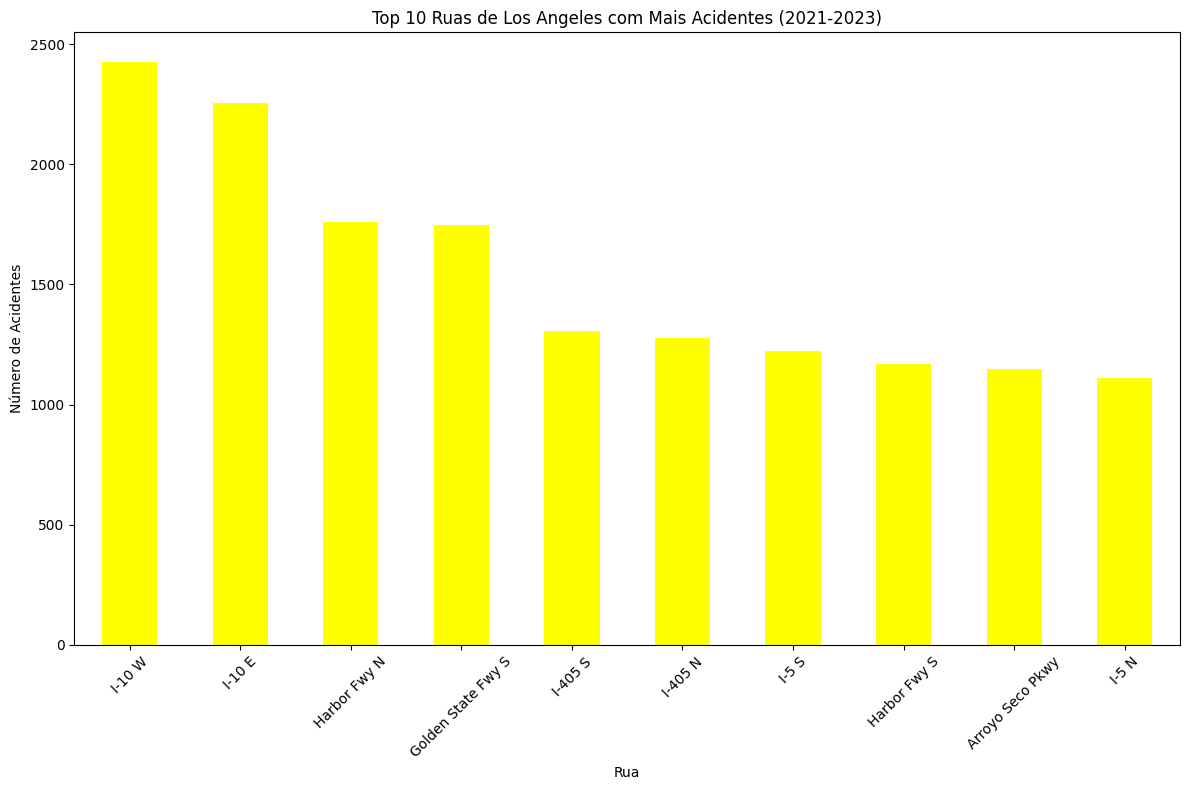

In [12]:
# Criar o gráfico de barras para as cidades com mais acidentes
plt.figure(figsize=(12, 8))
street_counts.plot(kind='bar', color='yellow')
plt.title("Top 10 Ruas de Los Angeles com Mais Acidentes (2021-2023)")
plt.xlabel("Rua")
plt.ylabel("Número de Acidentes")
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

#### Como a frequência dos acidentes variou por nível de gravidade ao longo dos meses em 2021?

A maioria dos acidentes registrados ao longo de 2021 corresponde ao nível de gravidade 2, que apresenta uma linha 
laranja destacada e altos valores de frequência, com variação significativa ao longo dos meses.
Os níveis de gravidade 1, 3 e 4 mantêm uma frequência relativamente baixa e estável em comparação com o nível 2, 
sugerindo que acidentes menos graves (nível 2) são os mais comuns.
A frequência de acidentes de gravidade 2 parece reduzir entre fevereiro e abril, mas há um aumento gradual e 
constante a partir de julho até dezembro.
Isso indica que a maioria dos acidentes com maior frequência são de menor gravidade e que há uma tendência de aumento 
no final do ano.

c:\AppData\Local\Temp\ipykernel_12592\2235602562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start_Time'] = pd.to_datetime(filtered_df['Start_Time'], errors='coerce')
c:\AppData\Local\Temp\ipykernel_12592\2235602562.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2021['Month_Name'] = filtered_df_2021['Start_Time'].dt.month.apply(lambda x: calendar.month_name[x])


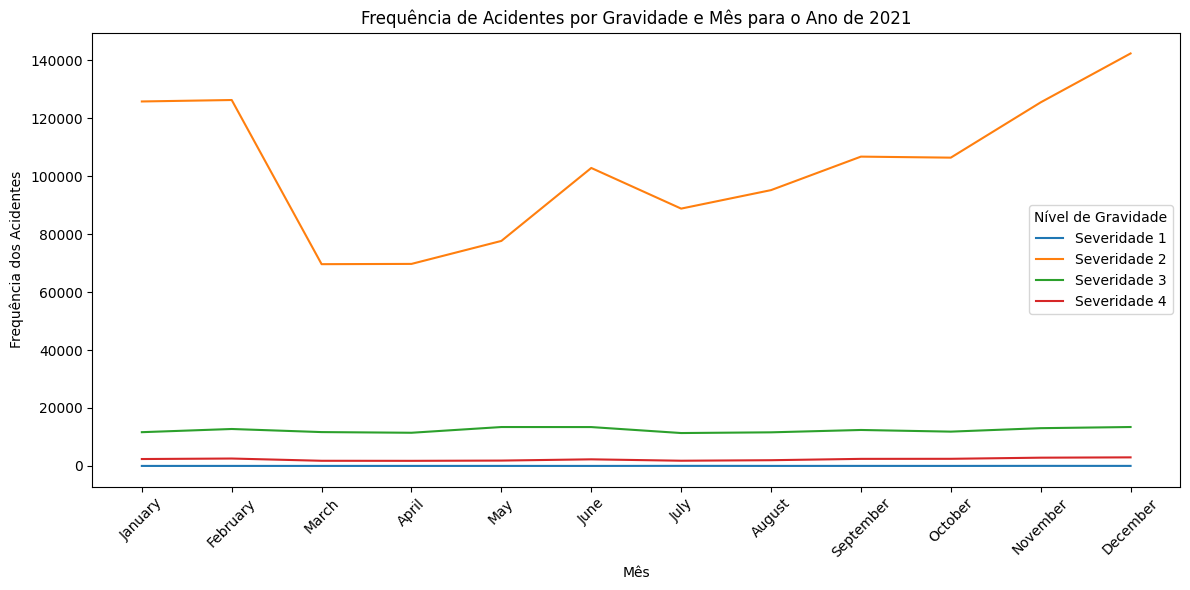

In [13]:
# Converter a coluna 'Start_Time' para datetime, se ainda não estiver feito
filtered_df['Start_Time'] = pd.to_datetime(filtered_df['Start_Time'], errors='coerce')

# Filtrar apenas os dados para o ano de 2021
filtered_df_2021 = filtered_df[filtered_df['Start_Time'].dt.year == 2021]

# Extrair o mês e gravidade, e contar a frequência de acidentes para cada mês e gravidade
filtered_df_2021['Month_Name'] = filtered_df_2021['Start_Time'].dt.month.apply(lambda x: calendar.month_name[x])
severity_monthly_counts = filtered_df_2021.groupby(['Month_Name', 'Severity']).size().unstack(fill_value=0)

# Ordenar os meses por ordem cronológica
ordered_months = [calendar.month_name[i] for i in range(1, 13)]
severity_monthly_counts = severity_monthly_counts.reindex(ordered_months, fill_value=0)

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
for severity in severity_monthly_counts.columns:
    plt.plot(severity_monthly_counts.index, severity_monthly_counts[severity], label=f'Severidade {severity}')

# Configurar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Frequência dos Acidentes')
plt.title('Frequência de Acidentes por Gravidade e Mês para o Ano de 2021')

# Configurar meses por extenso no eixo X
plt.xticks(ticks=range(12), labels=ordered_months, rotation=45)

# Exibir legenda
plt.legend(title='Nível de Gravidade')
plt.tight_layout()
plt.show()

#### Quais estados têm as maiores proporções de acidentes em relação ao total?

Califórnia (CA) lidera com 22.44% dos acidentes, representando a maior proporção em relação ao total nacional, o que 
sugere um número elevado de ocorrências nesse estado.
Flórida (FL), Texas (TX) e Carolina do Norte (NC) seguem com 10.96%, 7.80%, e 5.03%, respectivamente, também com 
percentuais significativos.
Os demais estados apresentam proporções bem menores, com menos de 5% cada, indicando uma concentração de acidentes em 
poucos estados.
Em resumo, o gráfico mostra uma alta concentração de acidentes nos estados de CA, FL, TX e NC, enquanto a maioria dos 
estados possui uma participação pequena no total de ocorrências.

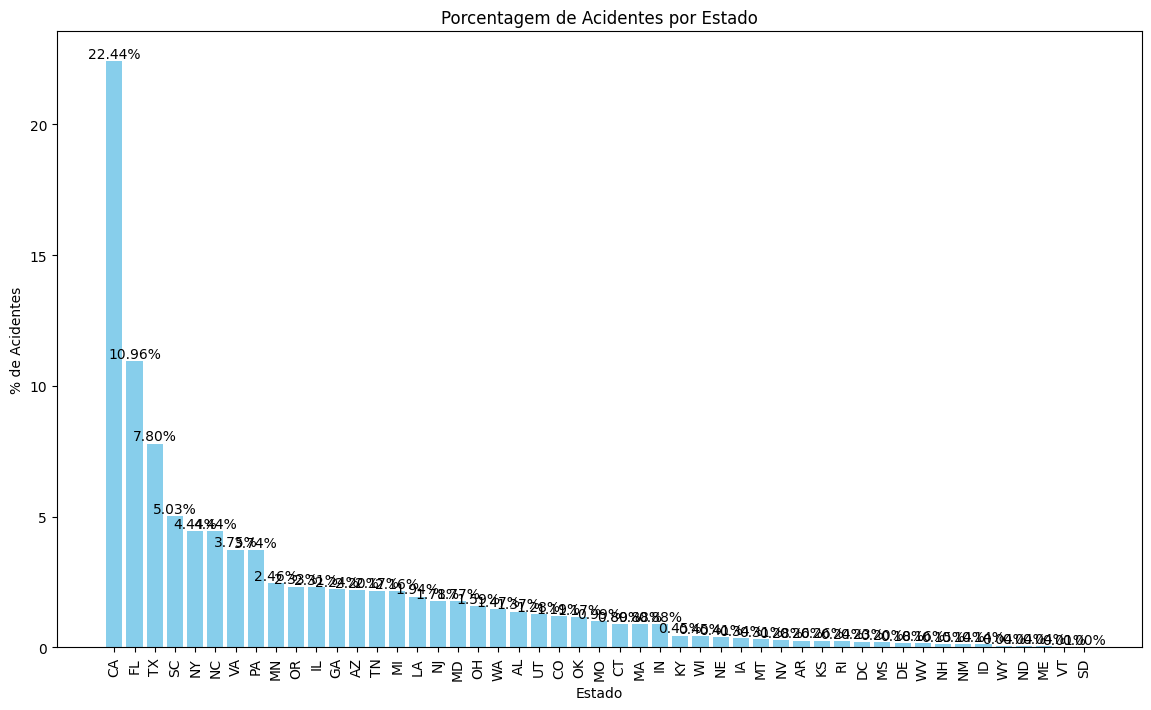

In [14]:
# Contagem de acidentes por estado
state_accidents = df['State'].value_counts().reset_index()
state_accidents.columns = ['State', 'Accident_Count']

# Calculando a porcentagem de acidentes em relação ao total
total_accidents = state_accidents['Accident_Count'].sum()
state_accidents['Accident_Percentage'] = (state_accidents['Accident_Count'] / total_accidents) * 100

# Gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(state_accidents['State'], state_accidents['Accident_Percentage'], color='skyblue')

# Adicionar valores de porcentagem em cima de cada barra
for bar, percentage in zip(bars, state_accidents['Accident_Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.2f}%',
        ha='center',
        va='bottom'
    )

# Configurações do gráfico
plt.xlabel('Estado')
plt.ylabel('% de Acidentes')
plt.title('Porcentagem de Acidentes por Estado')
plt.xticks(rotation=90)
plt.show()

#### Como o nível de gravidade do acidente impacta a duração média do incidente, e os acidentes mais graves tendem a durar mais tempo até serem resolvidos?

O gráfico mostra que, em geral, a duração média dos acidentes aumenta com o nível de gravidade. Acidentes de 
gravidade 4 levam em média 27.24 horas para serem resolvidos, enquanto os de gravidade 1 duram apenas 0.90 horas. 
A exceção é o nível de gravidade 3, que possui uma duração média inesperadamente baixa (1.25 horas), 
sugerindo uma possível variabilidade na classificação desses acidentes.

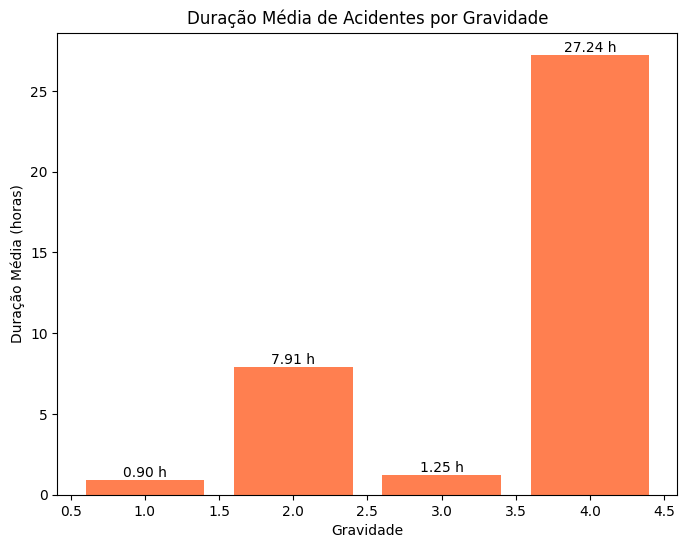

In [15]:
# Exemplo: se necessário, converter 'End_Time' para datetime e calcular a duração em horas
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600  # duração em horas

# Calcular a média de duração por gravidade
average_duration_severity = df.groupby('Severity')['Duration'].mean().reset_index()
average_duration_severity.columns = ['Severity', 'Average_Duration_Hours']

# Gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(average_duration_severity['Severity'], average_duration_severity['Average_Duration_Hours'], color='coral')

# Adicionar valores de duração média em cima de cada barra
for bar, duration in zip(bars, average_duration_severity['Average_Duration_Hours']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{duration:.2f} h',
        ha='center',
        va='bottom'
    )

# Configurações do gráfico
plt.xlabel('Gravidade')
plt.ylabel('Duração Média (horas)')
plt.title('Duração Média de Acidentes por Gravidade')
plt.show()

#### Há correlação entre precipitação e visibilidade?

O gráfico mostra um coeficiente de correlação de -0,19 entre precipitação (em polegadas) e visibilidade (em milhas), indicando uma correlação fraca e negativa. Isso sugere que, em média, quando a precipitação aumenta, a visibilidade tende a diminuir, mas essa relação é muito fraca e dispersa, como vemos na distribuição dos pontos. A maioria dos valores de visibilidade se concentra em níveis baixos de precipitação, com alguns pontos isolados em níveis mais altos de precipitação e visibilidade reduzida. Isso pode indicar que outros fatores também influenciam a visibilidade.

Coeficiente de correlação entre Precipitation(in) e Visibility(mi): -0.19


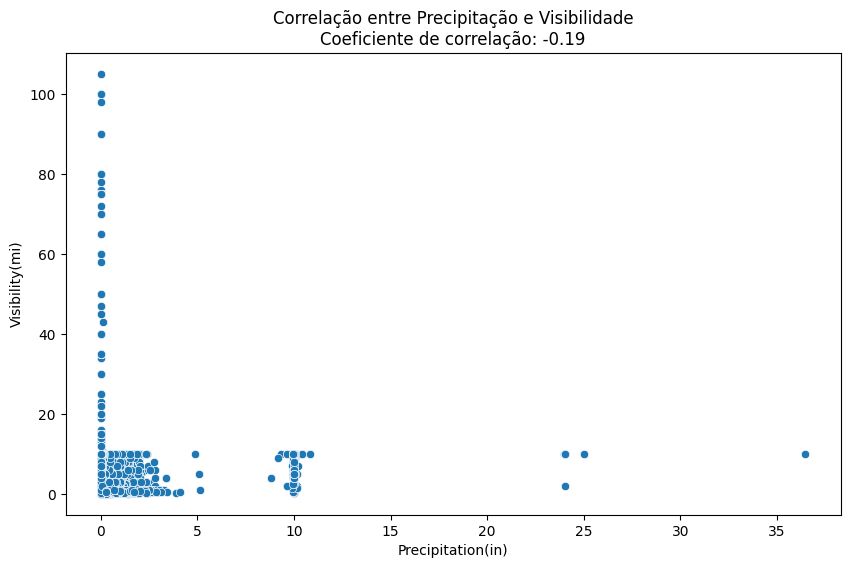

In [16]:
correl_precip_visibility = filtered_df['Precipitation(in)'].corr(filtered_df['Visibility(mi)'])
print(f"Coeficiente de correlação entre Precipitation(in) e Visibility(mi): {correl_precip_visibility:.2f}")

# Gráfico de dispersão para visualizar a relação entre Precipitation e Visibility
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Precipitation(in)', y='Visibility(mi)')
plt.title(f'Correlação entre Precipitação e Visibilidade\nCoeficiente de correlação: {correl_precip_visibility:.2f}')
plt.xlabel('Precipitation(in)')
plt.ylabel('Visibility(mi)')
plt.show()

#### Como as condições climáticas variam conforme o nível de severidade?
O gráfico indica que a condição climática "Fair" é predominante em todos os níveis de severidade, mas sua proporção diminui ligeiramente conforme a severidade aumenta. Em contrapartida, condições como "Cloudy" e "Light Rain" aumentam em prevalência à medida que a severidade sobe, especialmente em níveis 3 e 4, o que sugere uma ligação entre essas condições e eventos mais severos. Condições como "Mostly Cloudy" e "Partly Cloudy" apresentam variações pequenas e não parecem ter uma relação clara com o nível de severidade. Isso pode indicar que a ocorrência de eventos mais severos está mais associada ao aumento de nuvens e leve precipitação.

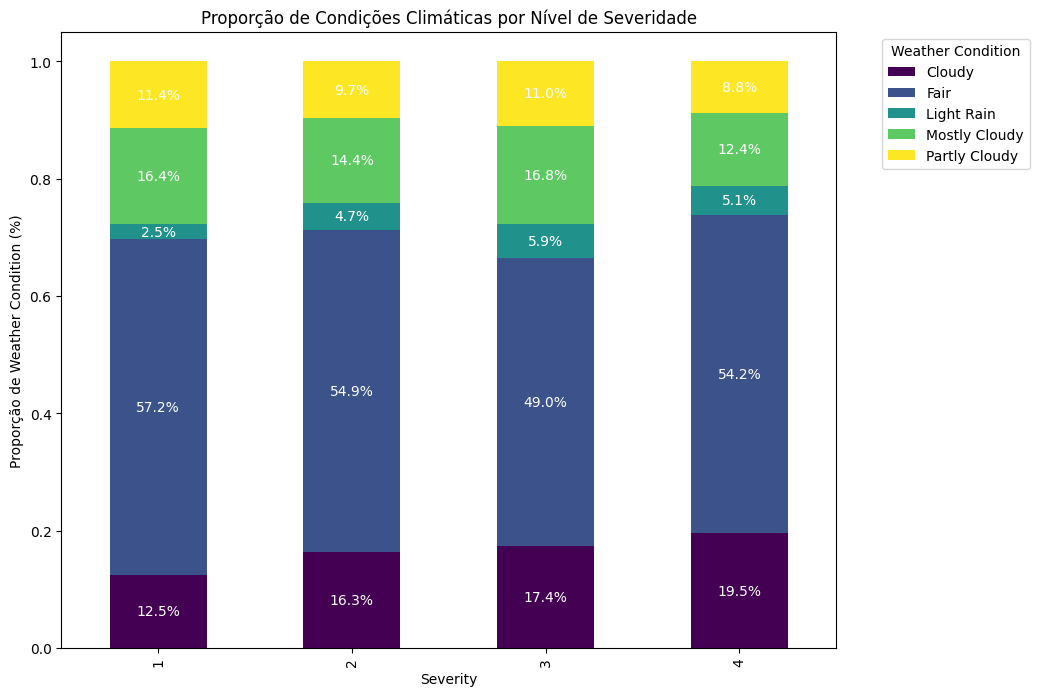

In [17]:
# Selecionar as condições climáticas mais comuns para simplificar o gráfico
condicoes_comuns = filtered_df['Weather_Condition'].value_counts().nlargest(5).index
df_condicao = filtered_df[filtered_df['Weather_Condition'].isin(condicoes_comuns)]

# Calcular a proporção de cada condição climática para cada nível de Severity
proporcao = (df_condicao.groupby(['Severity', 'Weather_Condition']).size() / 
             df_condicao.groupby('Severity').size()).unstack()

# Plotar o gráfico de barras empilhadas
ax = proporcao.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')

# Adicionar rótulos de porcentagem
for i in range(proporcao.shape[0]):
    total = proporcao.iloc[i].sum()  # Total para cada Severity
    for j in range(proporcao.shape[1]):
        if proporcao.iloc[i, j] > 0:
            percentage = proporcao.iloc[i, j] / total * 100  # Calcular porcentagem
            ax.text(i, proporcao.iloc[i, :j+1].sum() - proporcao.iloc[i, j] / 2, 
                    f'{percentage:.1f}%', ha='center', va='center', color='white')

# Adicionar título e rótulos
plt.title('Proporção de Condições Climáticas por Nível de Severidade')
plt.xlabel('Severity')
plt.ylabel('Proporção de Weather Condition (%)')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Qual é a proporção de acidentes que ocorreram em cruzamentos em comparação com aqueles que não ocorreram?
A análise dos dados revela que 90,2% dos acidentes não ocorreram em cruzamentos (False), enquanto 9,8% dos acidentes ocorreram em cruzamentos (True). Isso indica que a maioria dos acidentes registrados não aconteceu em áreas de cruzamento.

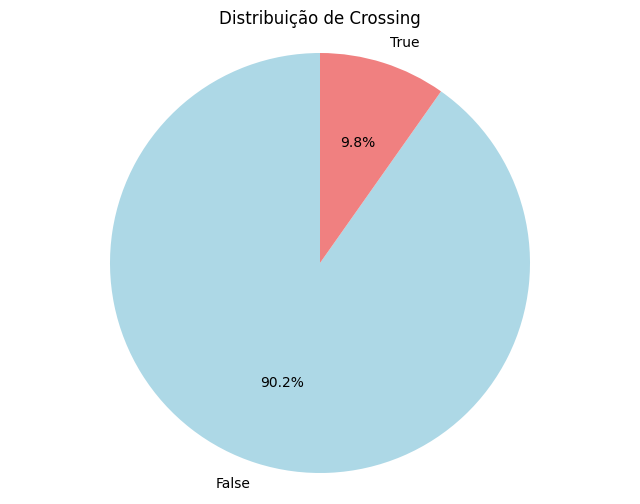

In [20]:
# Gráfico de pizza para a coluna 'Crossing'
crossing_counts = filtered_df['Crossing'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(crossing_counts, labels=crossing_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribuição de Crossing')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.show()

#### Qual é a distribuição dos acidentes entre períodos diurnos e noturnos?
A distribuição dos acidentes mostra que 31,6% ocorreram durante a noite (night), enquanto 68,4% ocorreram durante o dia (day). Isso sugere que a maioria dos acidentes acontece durante o período diurno.



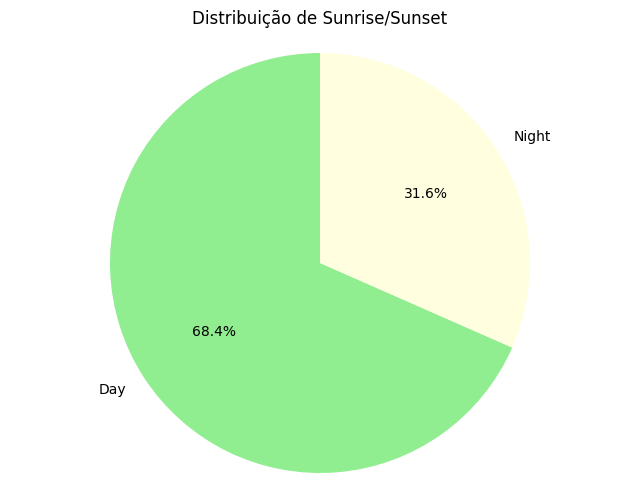

In [22]:
sunrise_sunset_counts = filtered_df['Sunrise_Sunset'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sunrise_sunset_counts, labels=sunrise_sunset_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightyellow'])
plt.title('Distribuição de Sunrise/Sunset')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.show()

#### Scikit Learn: modelo para determinar Severity 

In [18]:
features = ['Temperature(F)', 'Wind_Speed(mph)', 'Humidity(%)', 
            'Precipitation(in)', 'Visibility(mi)', 'Weather_Condition']
X = filtered_df[features]
y = filtered_df['Severity']

# Processar a coluna Weather_Condition usando OneHotEncoder
X = pd.get_dummies(X, columns=['Weather_Condition'], drop_first=True)

# Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy do modelo: {accuracy:.2f}')
print('Relatório de Classificação:')
print(report)

KeyboardInterrupt: 

#### Conclusão

A análise dos dados sobre acidentes registrados entre 2021 e 2023 revela uma concentração alarmante em estados com alta densidade populacional, sendo a Califórnia a líder absoluta com mais de 600.000 acidentes, representando 22,44% do total nacional. O Texas segue com mais de 400.000 acidentes (7,80%), enquanto Flórida, Nova York e Pensilvânia também apresentam números elevados, embora em menor escala. Essa distribuição destaca a necessidade de um foco renovado em medidas de segurança viária, especialmente em áreas urbanas onde o tráfego é intenso, já que acidentes em cruzamentos, que representam 9,8% do total, e as altas taxas de ocorrências noturnas (31,6%) indicam pontos críticos que requerem intervenção imediata.

Em Los Angeles, a situação é particularmente preocupante, com a cidade registrando mais que o dobro de acidentes em comparação com outras grandes cidades californianas, como Sacramento e San Diego. As rodovias I-10 W e I-10 E são as mais perigosas, com mais de 2.000 acidentes cada, o que ressalta a necessidade de melhorias na infraestrutura viária, sinalização e fiscalização. A prevalência de acidentes de gravidade 2, que constitui a maioria dos registros, e a tendência de aumento nos meses finais do ano, sugere que, embora os acidentes mais graves sejam menos frequentes, quando ocorrem, impactam de maneira significativa o tempo de resolução, especialmente aqueles classificados como gravidade 4, que levam em média 27,24 horas para serem finalizados.

Além das questões de tráfego e infraestrutura, as condições climáticas também desempenham um papel importante na segurança viária. Embora a correlação entre precipitação e visibilidade seja fraca, o aumento de condições climáticas adversas, como "Cloudy" e "Light Rain", coincide com a gravidade dos acidentes, especialmente nos níveis mais altos. A predominância de acidentes durante o dia (68,4%) em comparação com a noite reforça a ideia de que a visibilidade e a infraestrutura adequada são fundamentais para prevenir acidentes. Portanto, é essencial implementar medidas que considerem tanto o comportamento dos motoristas quanto as condições do ambiente para melhorar a segurança nas vias.
